In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re # regular expressions
import nltk # natural language tool kite
import string
# from nltk.corpus import stopwords
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from nltk.tokenize import sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.probability import FreqDist

In [2]:
df = pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A11 Text Mining\\Elon_musk.csv", encoding='cp1252')
df

Unnamed: 0                                               Text
0              1                             @kunalb11 I’m an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [3]:
# Joinining all the reviews into single paragraph 
df = [Text.strip() for Text in df.Text] # remove both the leading and the trailing characters
df = [Text for Text in df if Text] # removes empty strings, because they are considered in Python as False
df[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [4]:
# Joining the list into one string/text
text = ' '.join(df)
text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [5]:
# nltk.download('stopwords')
nltk.download('punkt')
# nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Shivani
[nltk_data]     Bhavsar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I’m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [7]:
no_punc_text = re.sub("[^A-Za-z" "]+"," ",no_punc_text).lower() #remove special character
# no_punc_text = re.sub("[0-9" "]+"," ",no_punc_text) #remove numbers
# no_punc_text = re.sub(r'^https?:\/\/.*[\r\n]*', '', no_punc_text).lower() #remove hyperlink
no_punc_text

'kunalb i m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview gtera doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox httpstco wfkmyu oj frodo was the underdoge all thought he would fail himself most of all httpstcozgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest httpstco rwe uhsts geoffkeighley unrealengine it s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u f u f this is true power haha httpstcofc uhqsd o freewalletorg any crypto wallet tha

In [8]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb', 'i', 'm', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'httpstco']


In [9]:
len(text_tokens)

22406

### Frequency Distribution :

In [10]:
fd_tokens = FreqDist(text_tokens)
fd_tokens.most_common(10)

[('the', 487),
 ('to', 400),
 ('a', 395),
 ('is', 355),
 ('of', 316),
 ('u', 270),
 ('f', 249),
 ('spacex', 246),
 ('in', 219),
 ('amp', 218)]

In [11]:
#importing given stopwords file
with open("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A11 Text Mining\\stop.txt") as stop_words:
    stop_words = stop_words.read()
    print(stop_words)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [12]:
stop_tokens = [word for word in text_tokens if not word in stop_words]
print(stop_tokens[0:40])

['kunalb', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'happy', 'year', 'ox', 'httpstco', 'wfkmyu', 'oj', 'frodo', 'underdoge', 'thought', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx', 'haha', 'flcnhvy', 'anonyx', 'tweets']


In [13]:
# Joinining all the reviews into single paragraph 
stop_string = " ".join(stop_tokens)
stop_string

'kunalb alien idaacarmack ray tracing cyberpunk hdr nextlevel joerogan spotify great interview gtera doge underestimated teslacn congratulations tesla china amazing execution year happy year ox httpstco wfkmyu oj frodo underdoge thought fail httpstcozgxjfdzzrm owensparks flcnhvy anonyx haha flcnhvy anonyx tweets represent realworld allocation entertaining outcome givedirectly agree clubhouse kanyewest httpstco rwe uhsts geoffkeighley unrealengine bought dogecoin lil toddler hodler joshmanmode issues sentencing bit high freewalletorg fixing freewalletorg unlock account astrojordy true power haha httpstcofc uhqsd freewalletorg crypto wallet private keys avoided costs freewalletorg sucks spacex nasa selected falcon heavy launch elements lunar gateway mission httpstco pwt ajtourville blkmdl rationaletienne adamklotz predict cash flow starlink ipo rationaletienne adamklotz starlink staggeringly difficult technical economic endeavor httpstco skqx rationaletienne adamklotz spacex pass deep ch

## Noramalize the data

* It entails condensing all forms of a word into a single representation of that word. For instance, “watched,” “watching,” and “watches” can all be normalized into “watch.” There are two major normalization methods:

  1. Stemming : 
  
  >     With stemming, a word is cut off at its stem, the smallest unit of that word from which you can create the descendant words. You just saw an example of this above with “watch.” Stemming simply truncates the string using common endings, so it will miss the relationship between “feel” and “felt,” for example.
  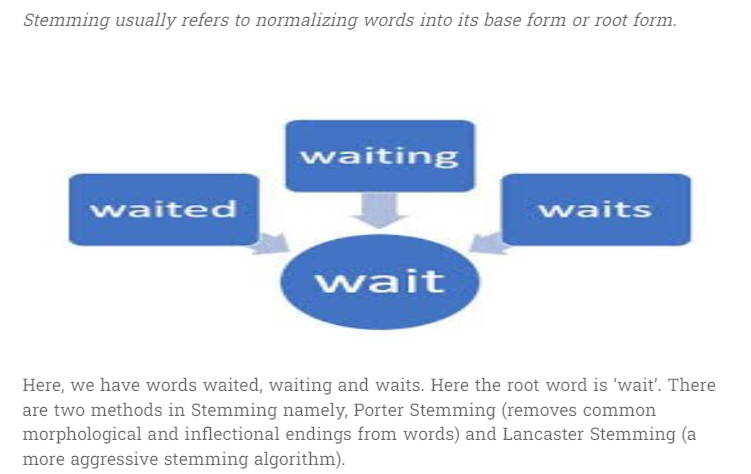
  
  2. Lemmatization:
  
  >    Lemmatization seeks to address this issue. This process uses a data structure that relates all forms of a word back to its simplest form, or lemma. Because lemmatization is generally more powerful than stemming, it’s the only normalization strategy offered by spaCy.
  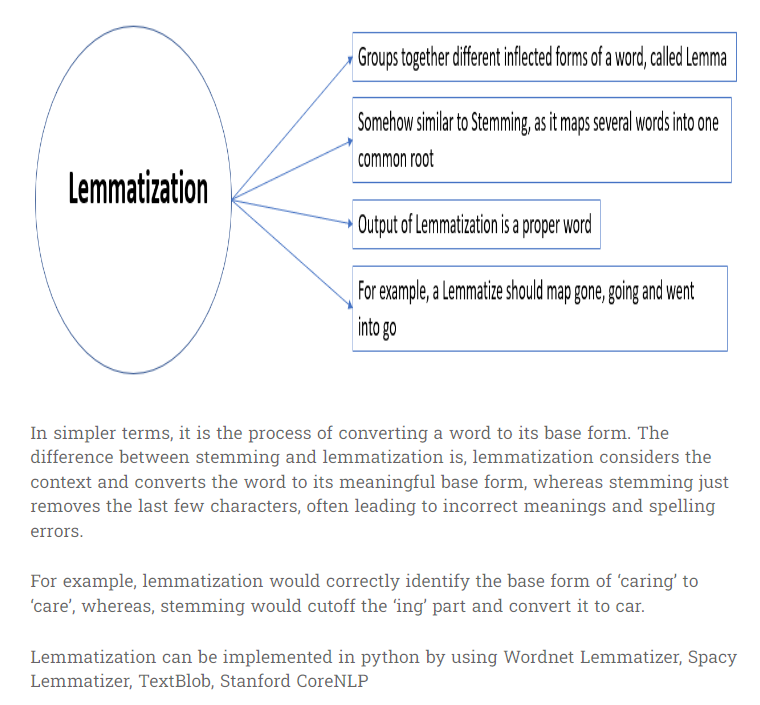

In [16]:
# Normalize the data
lower_words=[Text.lower() for Text in stop_tokens]
print(lower_words)

['kunalb', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'happy', 'year', 'ox', 'httpstco', 'wfkmyu', 'oj', 'frodo', 'underdoge', 'thought', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx', 'haha', 'flcnhvy', 'anonyx', 'tweets', 'represent', 'realworld', 'allocation', 'entertaining', 'outcome', 'givedirectly', 'agree', 'clubhouse', 'kanyewest', 'httpstco', 'rwe', 'uhsts', 'geoffkeighley', 'unrealengine', 'bought', 'dogecoin', 'lil', 'toddler', 'hodler', 'joshmanmode', 'issues', 'sentencing', 'bit', 'high', 'freewalletorg', 'fixing', 'freewalletorg', 'unlock', 'account', 'astrojordy', 'true', 'power', 'haha', 'httpstcofc', 'uhqsd', 'freewalletorg', 'crypto', 'wallet', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'sucks', 'spacex', 'nasa', 'selected', 'falcon', 'heavy', 'laun

In [18]:
# #Stemming
# from nltk.stem import PorterStemmer
# ps = PorterStemmer()
# stemmed_tokens = [ps.stem(word) for word in lower_string]
# print(stemmed_tokens[0:40])

In [50]:
# Lemmatization
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

kunalb alien idaacarmack ray tracing cyberpunk hdr nextlevel joerogan spotify great interview gtera doge underestimated teslacn congratulations tesla china amazing execution year happy year ox httpstco wfkmyu oj frodo underdoge thought fail httpstcozgxjfdzzrm owensparks flcnhvy anonyx haha flcnhvy anonyx tweets represent realworld allocation entertaining outcome givedirectly agree clubhouse kanyewest httpstco rwe uhsts geoffkeighley unrealengine bought dogecoin lil toddler hodler joshmanmode issues sentencing bit high freewalletorg fixing freewalletorg unlock account astrojordy true power haha httpstcofc uhqsd freewalletorg crypto wallet private keys avoided costs freewalletorg sucks spacex nasa selected falcon heavy launch elements lunar gateway mission httpstco pwt ajtourville blkmdl rationaletienne adamklotz predict cash flow starlink ipo rationaletienne adamklotz starlink staggeringly difficult technical economic endeavor httpstco skqx rationaletienne adamklotz spacex pass deep cha

In [52]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['kunalb', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimate', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'happy', 'year', 'ox', 'httpstco', 'wfkmyu', 'oj', 'frodo', 'underdoge', 'think', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx', 'haha', 'flcnhvy', 'anonyx', 'tweet', 'represent', 'realworld', 'allocation', 'entertaining', 'outcome', 'givedirectly', 'agree', 'clubhouse', 'kanyew', 'httpstco', 'rwe', 'uhst', 'geoffkeighley', 'unrealengine', 'buy', 'dogecoin', 'lil', 'toddler', 'hodler', 'joshmanmode', 'issue', 'sentence', 'bit', 'high', 'freewalletorg', 'fix', 'freewalletorg', 'unlock', 'account', 'astrojordy', 'true', 'power', 'haha', 'httpstcofc', 'uhqsd', 'freewalletorg', 'crypto', 'wallet', 'private', 'key', 'avoid', 'cost', 'freewalletorg', 'suck', 'spacex', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'element', 'lunar', '

In [53]:
clean_reviews=' '.join(lemmas)
clean_reviews

'kunalb alien idaacarmack ray trace cyberpunk hdr nextlevel joerogan spotify great interview gtera doge underestimate teslacn congratulations tesla china amazing execution year happy year ox httpstco wfkmyu oj frodo underdoge think fail httpstcozgxjfdzzrm owensparks flcnhvy anonyx haha flcnhvy anonyx tweet represent realworld allocation entertaining outcome givedirectly agree clubhouse kanyew httpstco rwe uhst geoffkeighley unrealengine buy dogecoin lil toddler hodler joshmanmode issue sentence bit high freewalletorg fix freewalletorg unlock account astrojordy true power haha httpstcofc uhqsd freewalletorg crypto wallet private key avoid cost freewalletorg suck spacex nasa select falcon heavy launch element lunar gateway mission httpstco pwt ajtourville blkmdl rationaletienne adamklotz predict cash flow starlink ipo rationaletienne adamklotz starlink staggeringly difficult technical economic endeavor httpstco skqx rationaletienne adamklotz spacex pass deep chasm negative cash flow year

In [74]:
fd_tokens = FreqDist(lemmas)
fd_tokens.most_common(10)

[('spacex', 246),
 ('tesla', 171),
 ('erdayastronaut', 142),
 ('ppathole', 123),
 ('flcnhvy', 114),
 ('httpstco', 108),
 ('great', 77),
 ('teslaownerssv', 73),
 ('wholemarsblog', 68),
 ('make', 64)]

In [75]:
pd.DataFrame.from_records([fd_tokens]).T.sort_values(0,ascending=False).head(20)

0
spacex           246
tesla            171
erdayastronaut   142
ppathole         123
flcnhvy          114
httpstco         108
great             77
teslaownerssv     73
wholemarsblog     68
make              64
launch            63
teslarati         59
nasaspaceflight   55
haha              55
good              52
year              48
work              47
yeah              41
dragon            41
cleantechnica     40

In [76]:
len(fd_tokens)

4640

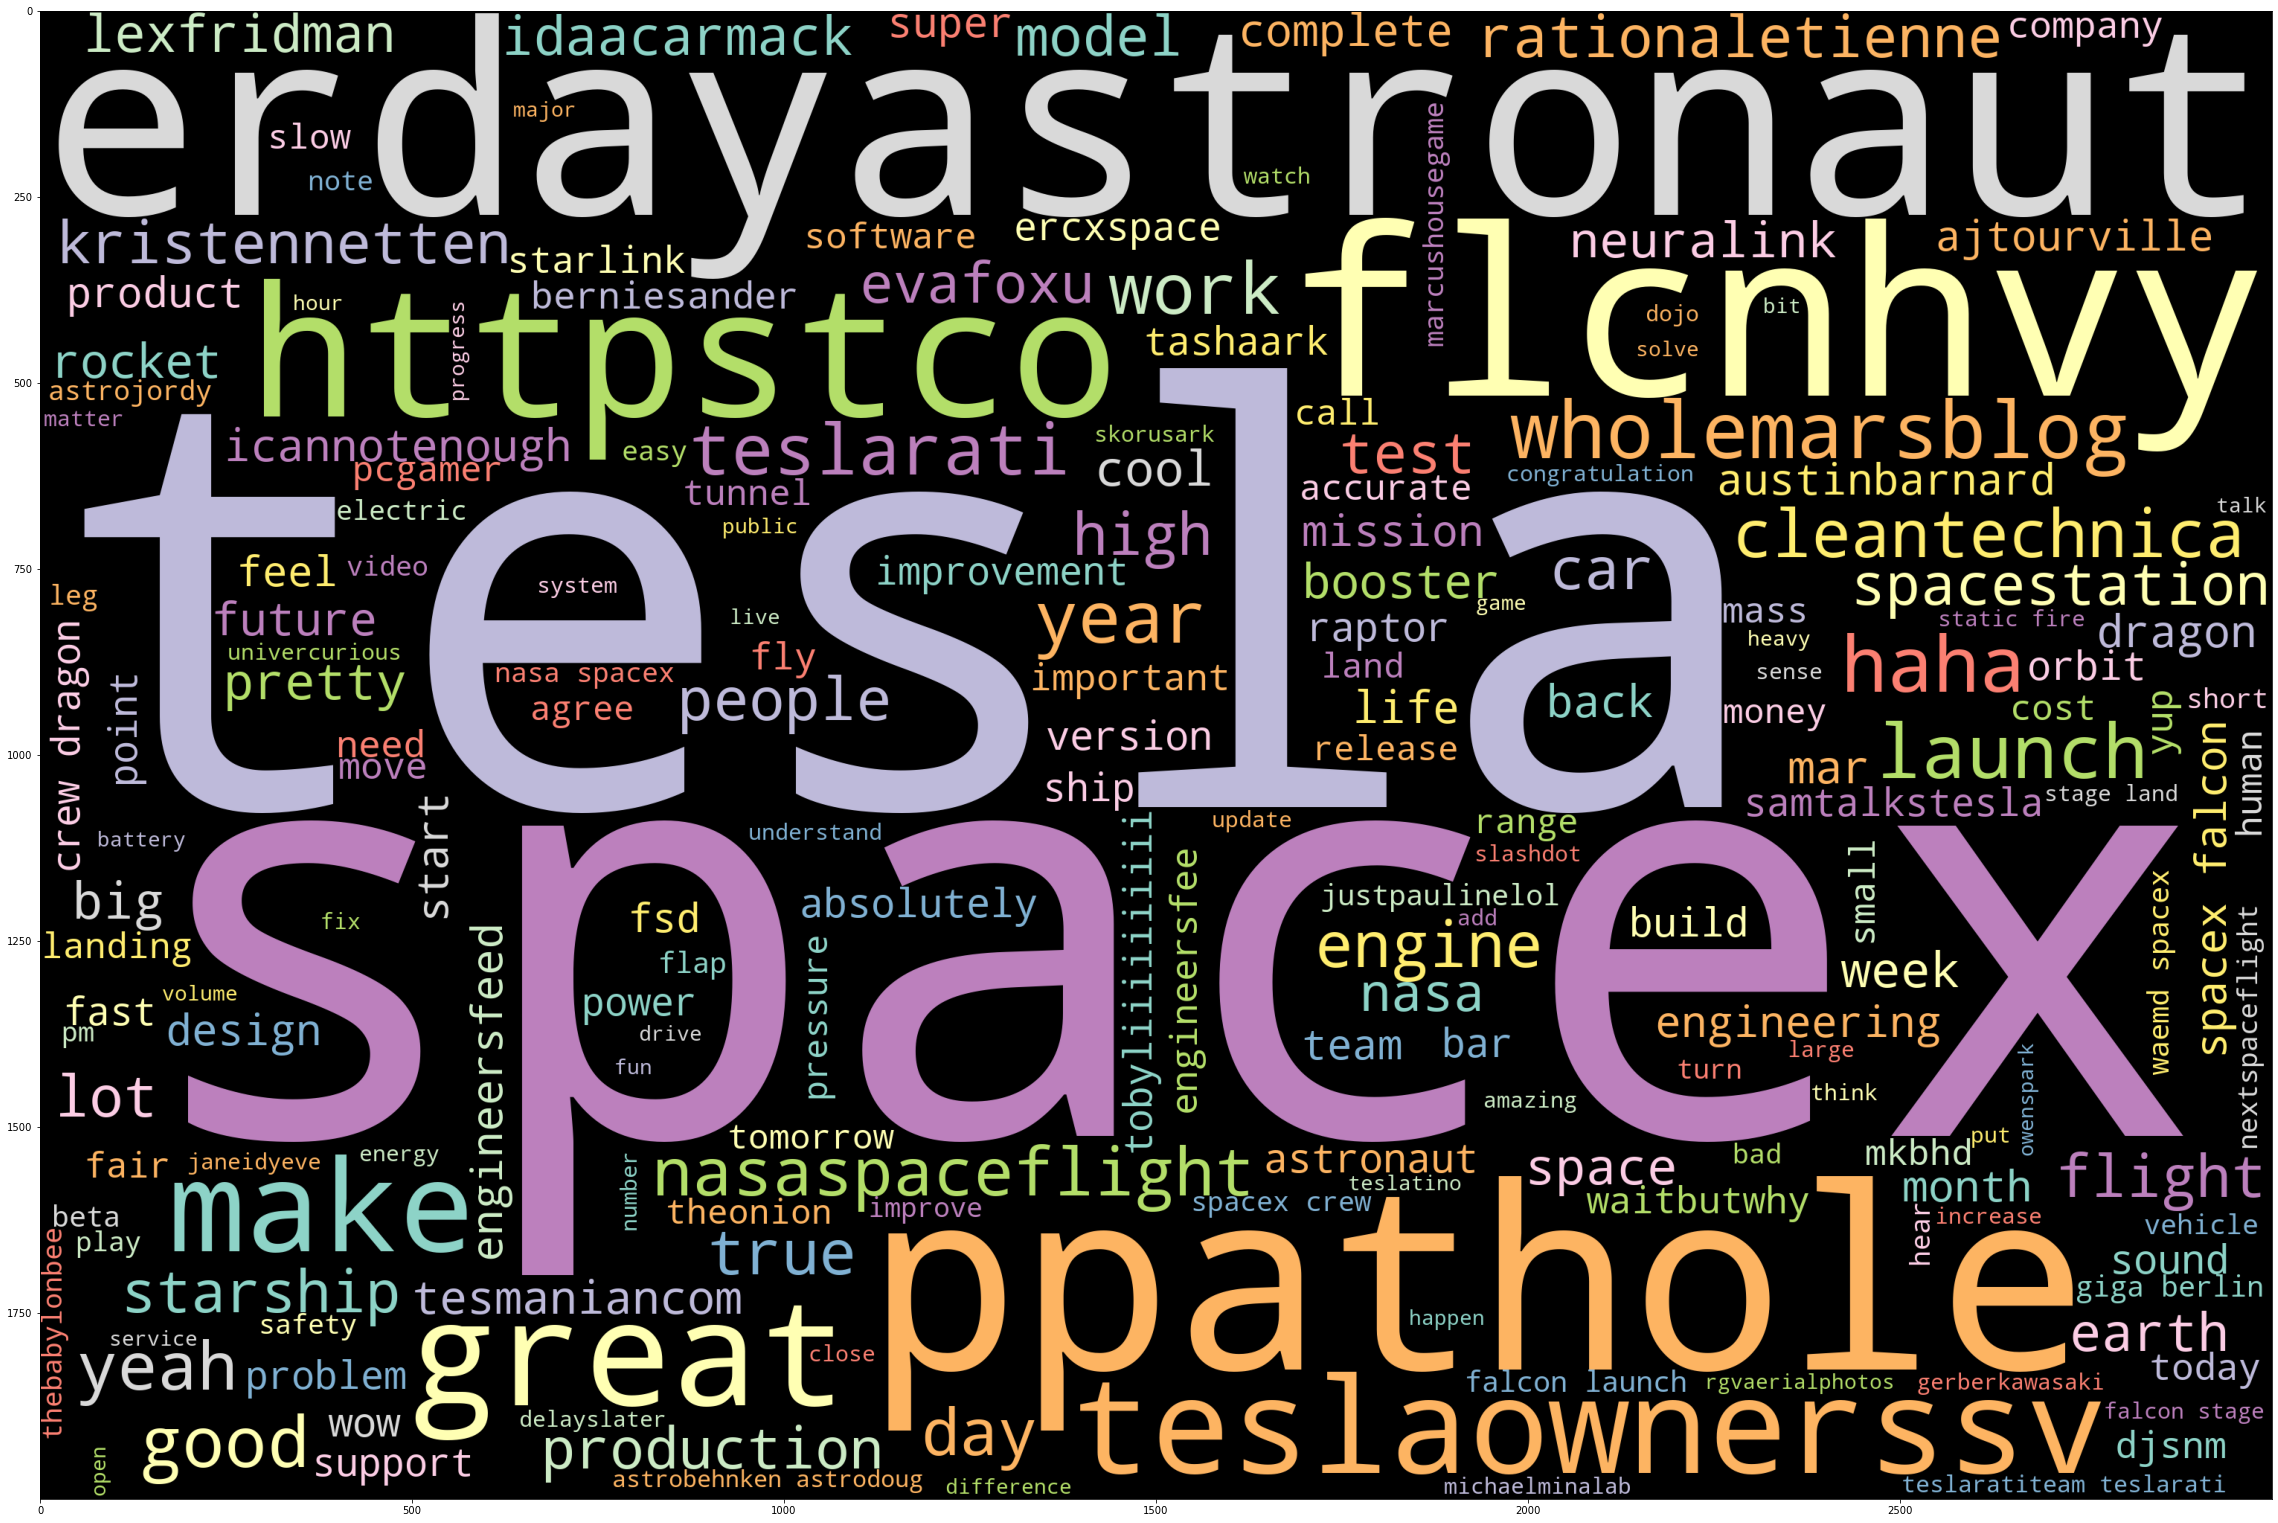

In [62]:
# WordCloud can be performed on the string inputs. That is the reason we have combined entire reviews into single paragraph

plt.figure(figsize=(40,30))
wordcloud_rev = WordCloud(
                      background_color='black',
                      colormap='Set3_r',
                      width=3000,
                      height=2000,
                     ).generate(clean_reviews)

plt.imshow(wordcloud_rev)





## Sentimental Analysis :

In [23]:
# positive words # Choose the path for +ve words stored in system
with open("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A11 Text Mining\\Pos-words.txt","r") as pos:
  pos_words = pos.read().split("\n")
  print(pos_words)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [24]:
len(pos_words)

2007

In [25]:
in_pos_words = [word for word in stop_tokens if word in pos_words]
print(in_pos_words[0:40])

['great', 'congratulations', 'amazing', 'happy', 'entertaining', 'prize', 'work', 'wow', 'improve', 'work', 'cute', 'fun', 'genius', 'easy', 'work', 'great', 'great', 'wow', 'destiny', 'hot', 'good', 'masterpiece', 'entertaining', 'tough', 'progress', 'super', 'worked', 'advanced', 'helping', 'good', 'great', 'correct', 'great', 'instrumental', 'fast', 'important', 'warm', 'beautiful', 'great', 'love']


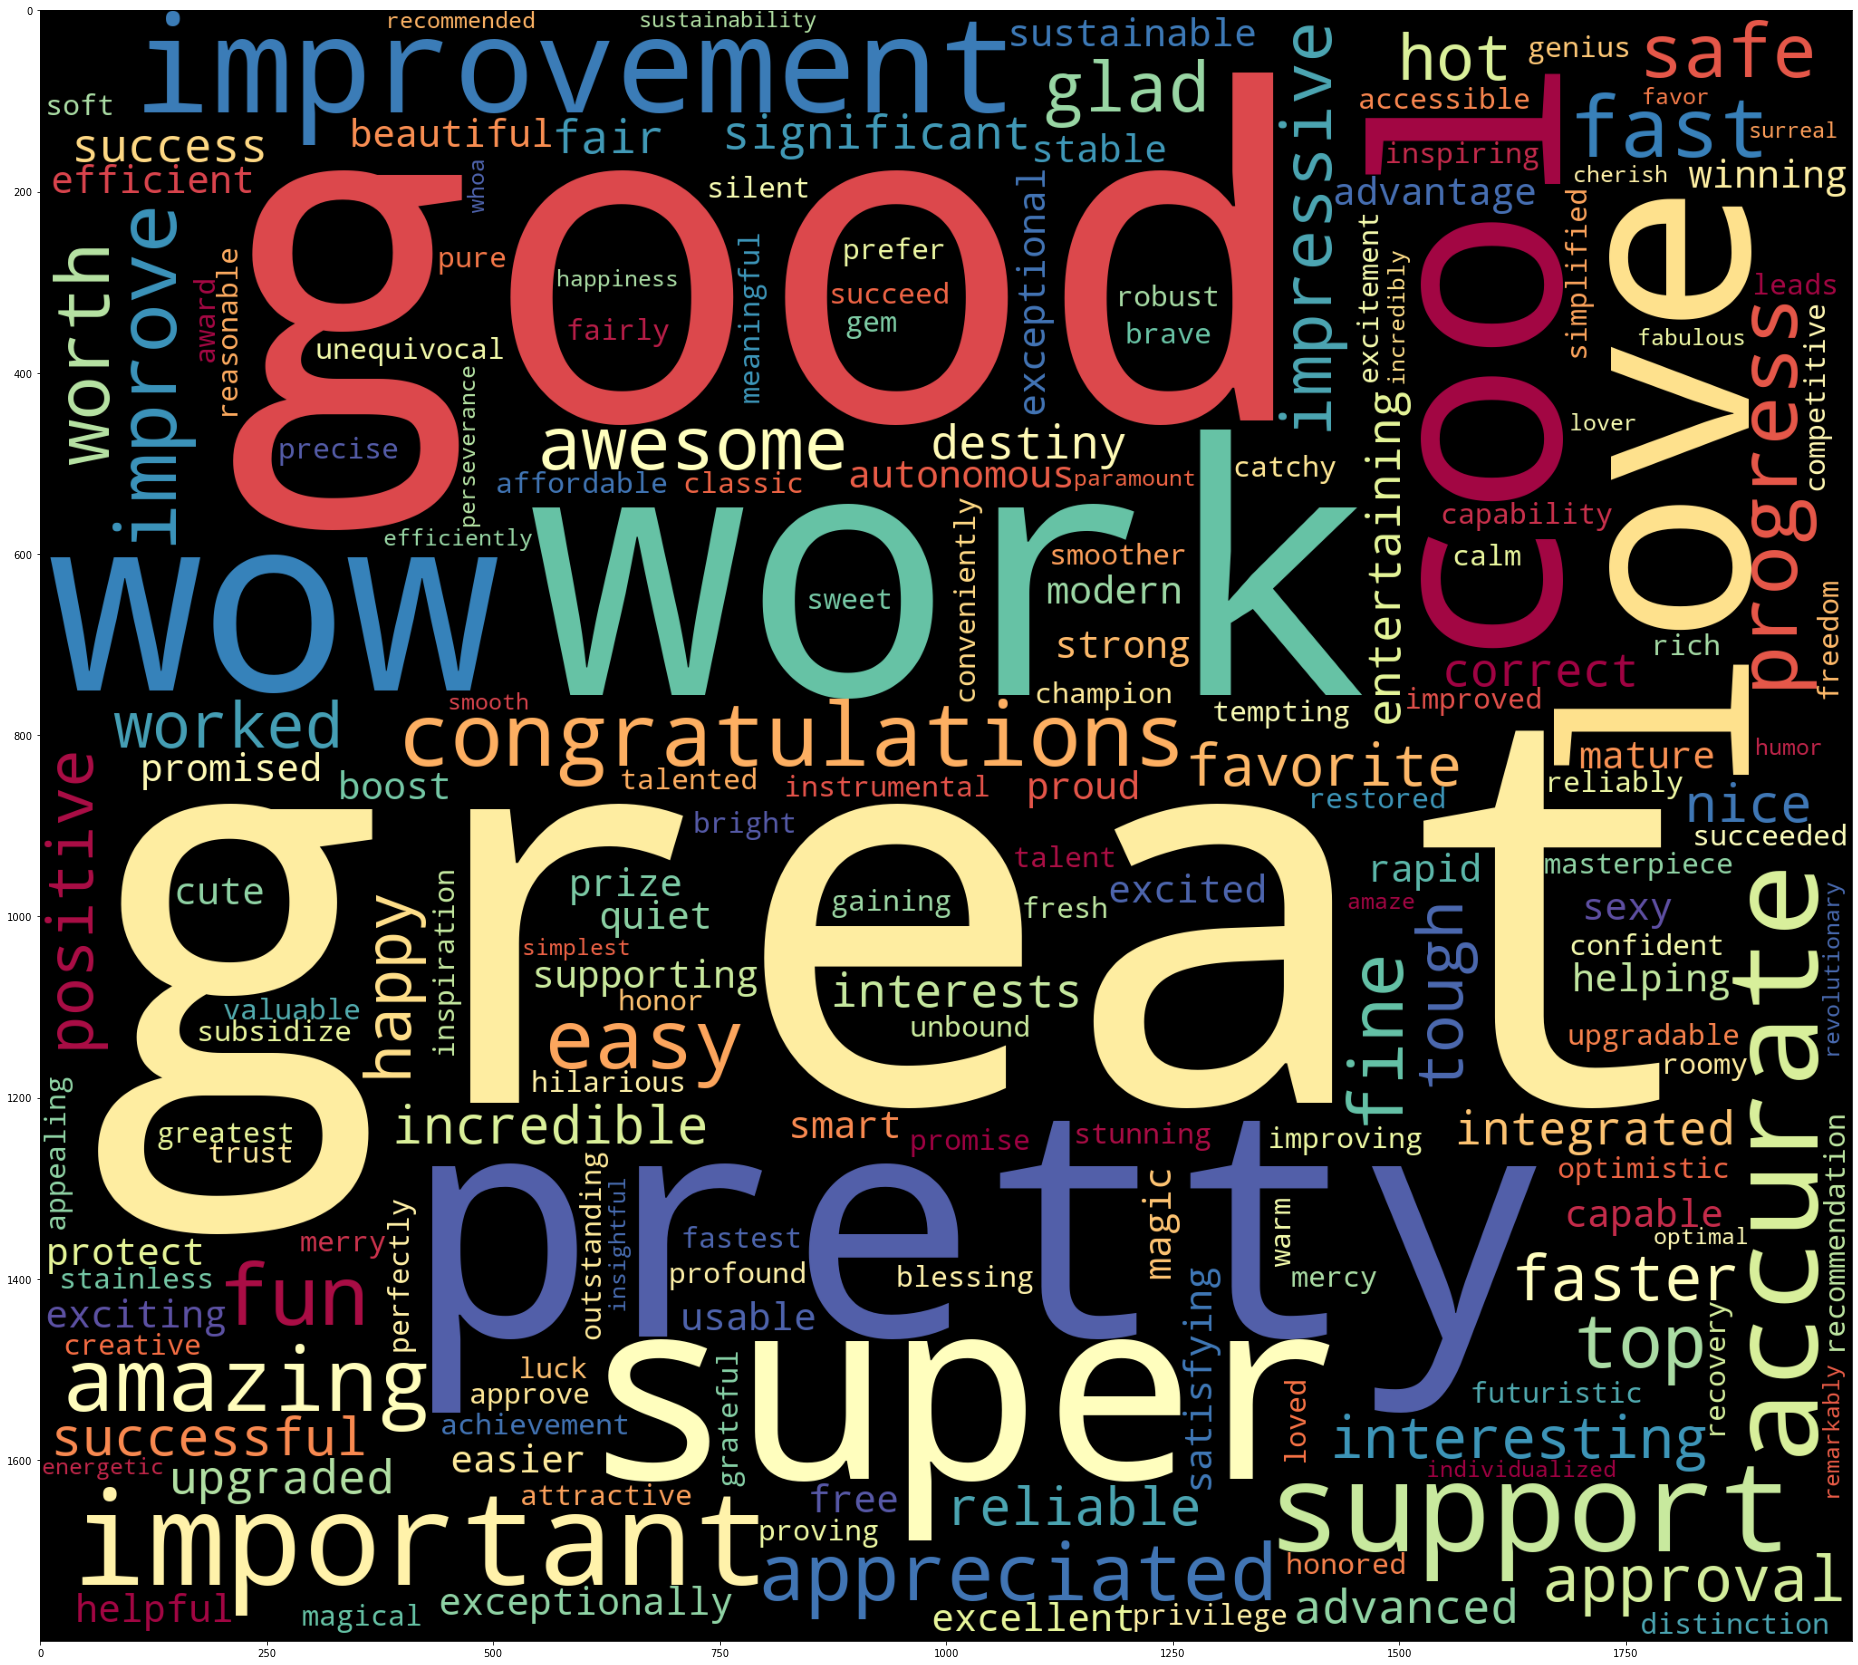

In [67]:
# Positive word cloud
# Choosing the only words which are present in positive words
pos_word_string = " ".join (in_pos_words)

plt.figure(figsize=(40,30))
wordcloud_pos = WordCloud(
                      background_color='black',
                       colormap='Spectral',
                      width=2000,
                      height=1800
                     ).generate(pos_word_string)
plt.imshow(wordcloud_pos)


In [27]:
len(pos_word_string)

4961

In [28]:
fd_pos_tokens = FreqDist(in_pos_words)
fd_pos_tokens.most_common(10)

[('great', 76),
 ('good', 51),
 ('work', 23),
 ('pretty', 22),
 ('super', 16),
 ('cool', 16),
 ('wow', 15),
 ('love', 15),
 ('important', 13),
 ('support', 12)]

In [29]:
len(fd_pos_tokens)

196

In [30]:
# negative words  Choose path for -ve words stored in system
with open("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A11 Text Mining\\Neg-words.txt","r") as neg:
  neg_words = neg.read().split("\n")
  print(neg_words)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [31]:
len(neg_words)

4784

In [32]:
in_neg_words = [word for word in stop_tokens if word in neg_words]
print(in_pos_words[0:40])

['great', 'congratulations', 'amazing', 'happy', 'entertaining', 'prize', 'work', 'wow', 'improve', 'work', 'cute', 'fun', 'genius', 'easy', 'work', 'great', 'great', 'wow', 'destiny', 'hot', 'good', 'masterpiece', 'entertaining', 'tough', 'progress', 'super', 'worked', 'advanced', 'helping', 'good', 'great', 'correct', 'great', 'instrumental', 'fast', 'important', 'warm', 'beautiful', 'great', 'love']


In [70]:
# negative word cloud
# Choosing the only words which are present in negwords
neg_words_string = " ".join (in_neg_words)

plt.figure(figsize=(40,30))
wordcloud_neg = WordCloud(
                      background_color='black',
                      colormap='cividis_r',
                      width=2000,
                      height=1800
                     ).generate(neg_words_string)
plt.imshow(wordcloud_neg)


In [34]:
fd_neg_tokens = FreqDist(in_neg_words)
fd_neg_tokens.most_common(10)

[('slow', 10),
 ('static', 9),
 ('bad', 8),
 ('problems', 8),
 ('cold', 7),
 ('bs', 6),
 ('problem', 6),
 ('critical', 6),
 ('irony', 6),
 ('symptoms', 6)]

In [35]:
len(fd_neg_tokens)

218

In [77]:
fd_tokens

FreqDist({'spacex': 246, 'tesla': 171, 'erdayastronaut': 142, 'ppathole': 123, 'flcnhvy': 114, 'httpstco': 108, 'great': 77, 'teslaownerssv': 73, 'wholemarsblog': 68, 'make': 64, ...})

In [78]:
c = dict(fd_tokens)
for i in c:
  c[i]=0
for i in pos_words:
    if i in c:
        c[i]=1
for o in neg_words:
    if o in c:
        c[o]=-1

In [79]:
c

{'kunalb': 0,
 'alien': 0,
 'idaacarmack': 0,
 'ray': 0,
 'trace': 0,
 'cyberpunk': 0,
 'hdr': 0,
 'nextlevel': 0,
 'joerogan': 0,
 'spotify': 0,
 'great': 1,
 'interview': 0,
 'gtera': 0,
 'doge': 0,
 'underestimate': -1,
 'teslacn': 0,
 'congratulations': 1,
 'tesla': 0,
 'china': 0,
 'amazing': 1,
 'execution': 0,
 'year': 0,
 'happy': 1,
 'ox': 0,
 'httpstco': 0,
 'wfkmyu': 0,
 'oj': 0,
 'frodo': 0,
 'underdoge': 0,
 'think': 0,
 'fail': -1,
 'httpstcozgxjfdzzrm': 0,
 'owensparks': 0,
 'flcnhvy': 0,
 'anonyx': 0,
 'haha': 0,
 'tweet': 0,
 'represent': 0,
 'realworld': 0,
 'allocation': 0,
 'entertaining': 1,
 'outcome': 0,
 'givedirectly': 0,
 'agree': 0,
 'clubhouse': 0,
 'kanyew': 0,
 'rwe': 0,
 'uhst': 0,
 'geoffkeighley': 0,
 'unrealengine': 0,
 'buy': 0,
 'dogecoin': 0,
 'lil': 0,
 'toddler': 0,
 'hodler': 0,
 'joshmanmode': 0,
 'issue': -1,
 'sentence': 0,
 'bit': 0,
 'high': 0,
 'freewalletorg': 0,
 'fix': 0,
 'unlock': 0,
 'account': 0,
 'astrojordy': 0,
 'true': 0,
 'power

In [81]:
file = pd.DataFrame(list(c.items()), columns = ["Words","Sentiment_Score"])
file

Words  Sentiment_Score
0               kunalb                0
1                alien                0
2          idaacarmack                0
3                  ray                0
4                trace                0
...                ...              ...
4635            social                0
4636  httpstcowjrzibkh                0
4637             click                0
4638           samwise                0
4639            gamgee                0

[4640 rows x 2 columns]

In [82]:
file["Sentiment_Score"].unique()

array([ 0,  1, -1], dtype=int64)

In [83]:
sns.countplot(file["Sentiment_Score"])

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment_Score', ylabel='count'>

In [84]:
x = file["Sentiment_Score"].value_counts()
x

 0    4239
-1     212
 1     189
Name: Sentiment_Score, dtype: int64

In [85]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Words            4640 non-null   object
 1   Sentiment_Score  4640 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 72.6+ KB


In [86]:
x_file = pd.DataFrame(list(x.items()) ,  columns = ["Sentiment_Score","Counts"])
x_file

Sentiment_Score  Counts
0                0    4239
1               -1     212
2                1     189

In [87]:
sen = SentimentIntensityAnalyzer()

sentiment_scores = []
for stop_tokens in fd_tokens:
    sentiment_scores.append(sen.polarity_scores(stop_tokens))
    
# Created a resultant list of score values
sentiment_scores[:10]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]

In [88]:
len(sentiment_scores)

4640

In [91]:
df_sent = pd.DataFrame(sentiment_scores)
df_sent.drop(['compound'], axis=1, inplace=True)

d = {'Sentiment': ['negatives', 'neutrals', 'positives'], 
     'Sum of Sentiment': [int(df_sent['neg'].sum()), int(df_sent['neu'].sum()), int(df_sent['pos'].sum())]}

scores_df = pd.DataFrame(d, columns = ['Sentiment', 'Sum of Sentiment'])
scores_df

Sentiment  Sum of Sentiment
0  negatives               133
1   neutrals              4282
2  positives               225

In [92]:
df_sent = pd.DataFrame(sentiment_scores)
df_sent.drop(['compound'], axis=1, inplace=True)

d = {'Sentiment': ['negatives', 'neutrals', 'positives'], 
     'Average of Sentiment': [(df_sent['neg'].mean()), (df_sent['neu'].mean()), (df_sent['pos'].mean())]}

scores_df = pd.DataFrame(d, columns = ['Sentiment', 'Average of Sentiment'])
scores_df

Sentiment  Average of Sentiment
0  negatives              0.028664
1   neutrals              0.922845
2  positives              0.048491